## altair demo

This notebook demonstrates a workflow for creating Altair data visualizations in a Jupyter notebook, then publishing those visualizations for public consumption as part of a data package.

To use `altair` in `Jupyter`, first install the `vega` and `altair` packages. For the purposes of this demo you will also ned to install the `vega_datasets` package. Then, in the notebook, enable its JavaScript extension:

In [1]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

You are now ready to use `altair`! `altair` is a new-ish declarative visualization grammar dataviz library from well-known Pythonistas Jake Vanderplas and Brain Granger. If you are new to declarative data visualization, [this Kaggle kernel](https://www.kaggle.com/residentmario/grammar-of-graphics-with-plotnine-optional/) exploring a similar library, `plotnine`, is a good introduction. If you are new to `altair`...keep reading this notebook!

For this demo we will use some of the example data visualizations provided in the `altair` gallery.

A map of US zip codes by leading digit:

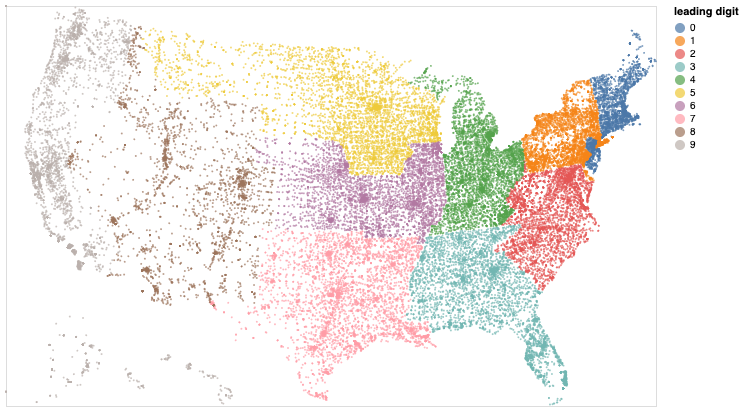

In [2]:
import altair as alt
from vega_datasets import data

source = data.zipcodes.url
alt.Chart(source).transform_calculate(
    "leading digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
).mark_circle(size=3).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='leading digit:N',
    tooltip='zip_code:N'
).project(
    type='albersUsa'
).properties(
    width=650,
    height=400
)

In [3]:
zipcodes = _

A streamgraph of unemployment across industries:

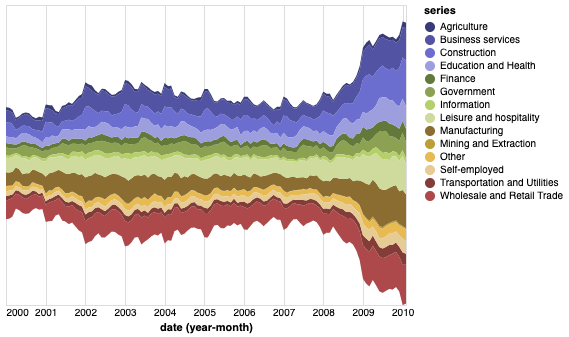

In [4]:
source = data.unemployment_across_industries.url

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N',
        scale=alt.Scale(scheme='category20b')
    )
)

In [5]:
unemployment = _

And finally, a scatter plot of temperatures:

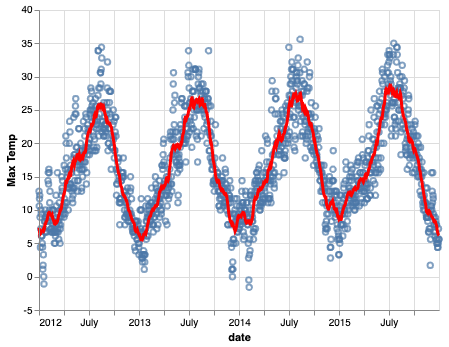

In [6]:
from vega_datasets import data

source = data.seattle_weather()

line = alt.Chart(source).mark_line(
    color='red',
    size=3
).transform_window(
    rolling_mean='mean(temp_max)',
    frame=[-15, 15]
).encode(
    x='date:T',
    y='rolling_mean:Q'
)

points = alt.Chart(source).mark_point().encode(
    x='date:T',
    y=alt.Y('temp_max:Q',
            axis=alt.Axis(title='Max Temp'))
)

points + line

In [7]:
temperatures = _

Behind the hood, every plot in `altair` is a JSON document formatted according to a spec known as Vega-Lite. `quilt3` has the capacity to display these JSON documents as part of the package landing page, inline in the browser.

To add these visualizations to a package preview, first write them to files:

In [10]:
import json
json.dump?

In [19]:
import json

with open('zipcodes_by_leading_digit.json', 'w') as f:
    f.write(zipcodes.to_json())

with open('unemployment_across_industries.json', 'w') as f:
    f.write(unemployment.to_json())

with open('seattle_weather.json', 'w') as f:
    f.write(temperatures.to_json())

Then, generate and push a new package containing these files and another special file, `quilt_summarize.json`. 

`quilt_summarize.json` is used by the catalog to decide what files to include in the catalog package preview.

We will also generate a `.quiltignore` file which will tell `quilt3` to ignore that junk folder when building the package.

In [20]:
!echo '.git/\n.ipynb_checkpoints/' > '.quiltignore'
!echo '["demo.ipynb", "seattle_weather.json", "unemployment_across_industries.json", "zipcodes_by_leading_digit.json"]' > 'quilt_summarize.json'

In [21]:
import quilt3
p = quilt3.Package().set_dir('/', './')
p

(local Package)
 └─.gitignore
 └─.quiltignore
 └─demo.ipynb
 └─quilt_summarize.json
 └─seattle_weather.json
 └─unemployment_across_industries.json
 └─zipcodes_by_leading_digit.json

In [ ]:
p.push('quilt/altair', 's3://quilt-example')

This is a convenient workflow for generating and pushing rich image previews to the Quilt 3 catalog.